In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("C:/Users/sumit/Downloads/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
#Who were the passengers with the top 3 largest family sizes?
data['FamilySize'] = data['SibSp'] + data['Parch']
family_size = data.sort_values(by = "FamilySize" ,ascending = False).head(3)
family_size[["Name" , "FamilySize","Survived"]]


,Name,FamilySize,Survived
846,"Sage, Mr. Douglas Bullen",10,0
324,"Sage, Mr. George John Jr",10,0
792,"Sage, Miss. Stella Anna",10,0


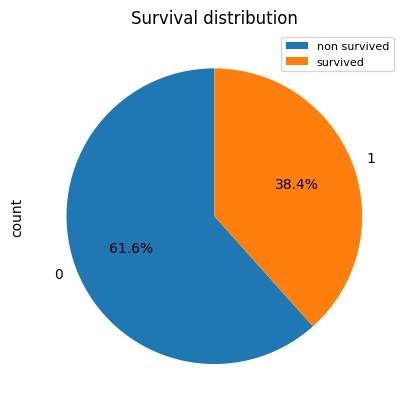

In [22]:
#. Create a pie chart showing survival distribution.
survival_distribution = data["Survived"].value_counts()
survival_distribution.plot(kind = "pie",autopct="%1.1f%%", startangle=90)   #autopct="%1.1f%%" shows percentage on slices
plt.title("Survival distribution")
plt.legend(["non survived" ,"survived"],fontsize=8)
plt.show()

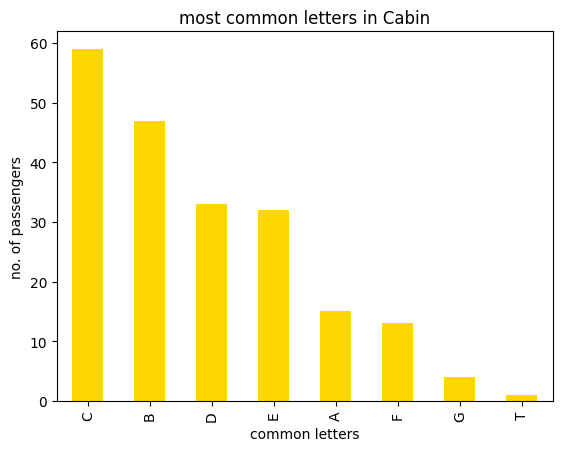

In [32]:
#Which cabin letter (first letter of Cabin) had the most passengers?

cabin_data = data["Cabin"].dropna()    #it drop missing values
cabin_letter = cabin_data.str[0]
common_value = cabin_letter.value_counts()
common_value.plot(kind="bar",color=["#ffd700"])
plt.title("most common letters in Cabin")
plt.ylabel("no. of passengers")
plt.xlabel("common letters")

plt.show()

The relation b/w Age and Fare is : 0.09606669176903894


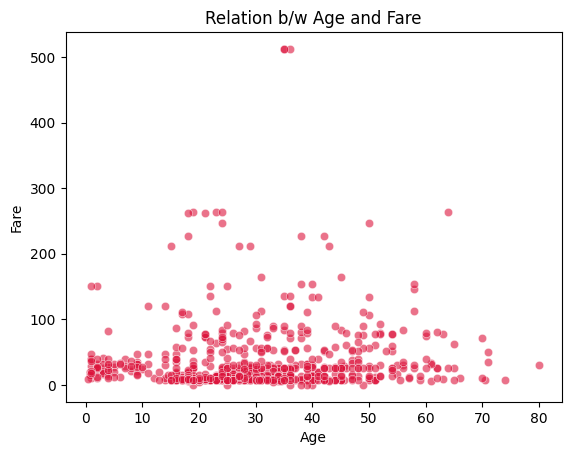

In [42]:
#check if there's any correlation between Fare and Age

relation = data["Age"].corr(data["Fare"])
print("The relation b/w Age and Fare is :",relation)
sns.scatterplot(data=data , x= "Age" ,y= "Fare",alpha=0.6 ,color="crimson")       #alpha ranges from 0.0 to 1.0 ,0.0 → completely transparent ,1.0 → completely opaque  
plt.title("Relation b/w Age and Fare")
plt.show()


In [52]:
#Find passengers with titles like 'Dr.', 'Rev.', or 'Col.'

data["Title"] = data["Name"].str.extract(r',\s*(Dr\.|Rev\.|Col\.)')    # Extract specific title into a new column

special_titles = data[data["Title"].notna()]      # Get only rows with those titles

special_titles[["Name", "Title", "Sex", "Age", "Survived"]]     #.notna() is a method in Pandas that returns True for non-missing values (i.e., values that are not NaN), and False for missing values (NaN).




,Name,Title,Sex,Age,Survived
149,"Byles, Rev. Thomas Roussel Davids",Rev.,male,42.0,0
150,"Bateman, Rev. Robert James",Rev.,male,51.0,0
245,"Minahan, Dr. William Edward",Dr.,male,44.0,0
249,"Carter, Rev. Ernest Courtenay",Rev.,male,54.0,0
317,"Moraweck, Dr. Ernest",Dr.,male,54.0,0
398,"Pain, Dr. Alfred",Dr.,male,23.0,0
626,"Kirkland, Rev. Charles Leonard",Rev.,male,57.0,0
632,"Stahelin-Maeglin, Dr. Max",Dr.,male,32.0,1
647,"Simonius-Blumer, Col. Oberst Alfons",Col.,male,56.0,1
660,"Frauenthal, Dr. Henry William",Dr.,male,50.0,1
